# Regression Exercise: Random Forest and Gradient Boosting
Follow the steps below to load, preprocess, and model the UCI Auto MPG dataset. You will implement both a Random Forest Regressor and a Gradient Boosting Regressor.
Use `# Your code here` in code cells to fill in your solutions.

## Step 1: Load the Dataset
Use `fetch_openml` to load the UCI 'Auto MPG' dataset and inspect its structure.

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
# Step 1: Load the dataset
# Your code here
from sklearn.datasets import fetch_openml
auto_mpg = fetch_openml(name='autoMpg', version=1, as_frame=True)
df = auto_mpg.frame
print(df)
print(df.info())


 

    cylinders  displacement  horsepower  weight  acceleration model origin  \
0           8         307.0       130.0    3504          12.0    70      1   
1           8         350.0       165.0    3693          11.5    70      1   
2           8         318.0       150.0    3436          11.0    70      1   
3           8         304.0       150.0    3433          12.0    70      1   
4           8         302.0       140.0    3449          10.5    70      1   
..        ...           ...         ...     ...           ...   ...    ...   
393         4         140.0        86.0    2790          15.6    82      1   
394         4          97.0        52.0    2130          24.6    82      2   
395         4         135.0        84.0    2295          11.6    82      1   
396         4         120.0        79.0    2625          18.6    82      1   
397         4         119.0        82.0    2720          19.4    82      1   

     class  
0     18.0  
1     15.0  
2     18.0  
3     16.0 

## Step 2: Data Cleaning
Identify and handle missing values in the dataset. Drop or impute as appropriate.

In [189]:
# Step 2: Data cleaning
# Your code here
# check for missing values
print(df.isnull().sum())


cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model           0
origin          0
class           0
dtype: int64


In [190]:
# Impute missing 'horsepower' values with the median
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


C:\Users\ksab2\AppData\Local\Temp\ipykernel_20764\3220285668.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


In [191]:
print(df.isnull().sum())


cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
class           0
dtype: int64


## Step 3: Preprocessing
- Separate features (`X`) and target (`y` = 'mpg').
- Identify numeric and categorical columns.
- Build a `ColumnTransformer` to scale numeric features and one-hot encode categorical features.
- Split into training and test sets.

In [192]:
# Step 3: Preprocessing
# Your code here
# import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [193]:
# 1. Separate features and target
x = df.drop('class', axis=1)
y = df['class']

In [194]:

categorical_features=[]
numerical_features=[]
for  feat in df.columns:
    if feat not in ['class']:
        if len(df[feat].unique())<=5:
            categorical_features.append(feat)
        else:
            numerical_features.append(feat)

print(f"Numerical features are: {numerical_features}")
print(f"Categorical features are: {categorical_features}")

Numerical features are: ['displacement', 'horsepower', 'weight', 'acceleration', 'model']
Categorical features are: ['cylinders', 'origin']


In [195]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (318, 7)
Shape of x_test: (80, 7)
Shape of y_train: (318,)
Shape of y_test: (80,)


In [196]:
# 3. standard scaling of the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train[numerical_features]=scaler.fit_transform(x_train[numerical_features])
x_test[numerical_features]=scaler.transform(x_test[numerical_features])

x_train[numerical_features]

,displacement,horsepower,weight,acceleration,model
3,1.090196,1.265821,0.552826,-1.319334,-1.696667
18,-0.922996,-0.408635,-0.999667,-0.413182,-1.696667
376,-0.981350,-0.948782,-1.124772,0.927922,1.638975
248,-0.981350,-1.164840,-1.392854,0.275493,0.527094
177,-0.747936,-0.219583,-0.327675,-0.231952,-0.306816
...,...,...,...,...,...
71,-1.185587,-0.165569,-0.761372,-0.775643,-1.140727
106,1.537573,2.076041,1.822940,-1.138103,-0.862757
270,-0.563150,-0.219583,-0.540949,-0.304444,0.527094
348,-1.000801,-1.110826,-1.094985,0.601707,1.361005


## Step 4: Random Forest Regressor
Create a pipeline with the preprocessor and `RandomForestRegressor`. Use `GridSearchCV` to tune `n_estimators` and `max_depth`.

In [197]:
# Step 4: Random Forest with GridSearchCV
# Your code here
# traning model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100, 150],
    'max_depth': [None, 3, 5],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
}

clf=RandomForestRegressor( random_state=42)

Grid_re=GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,

)

In [198]:
Grid_re.fit(x_train,y_train)

c:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

## Step 5: Gradient Boosting Regressor
Create a pipeline with the preprocessor and `GradientBoostingRegressor`. Use `GridSearchCV` to tune `n_estimators`, `learning_rate`, and `max_depth`.

In [199]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 3 to 102
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cylinders     318 non-null    category
 1   displacement  318 non-null    float64 
 2   horsepower    318 non-null    float64 
 3   weight        318 non-null    float64 
 4   acceleration  318 non-null    float64 
 5   model         318 non-null    float64 
 6   origin        318 non-null    category
dtypes: category(2), float64(5)
memory usage: 15.9 KB


In [200]:
# Step 5: Gradient Boosting with GridSearchCV
# Your code here
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [50,100,150],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [None,2, 3, 5],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
}
Grid_gbr=GridSearchCV(
    gbr,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
)
Grid_gbr.fit(x_train,y_train)

c:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05],
                         'max_depth': [None, 2, 3, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

## Step 6: Model Evaluation
Evaluate both models on the test set using:
- R² score
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)


In [201]:
#best feature
best_gb=Grid_gbr.best_estimator_

In [202]:
# Step 6: Evaluation metrics
# Your code here
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred=best_gb.predict(x_test)
r2=r2_score(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)

print(f"r2 Score is :{r2}")
print(f"Mean Squared Error is :{MSE}")
print(f"Mean Absolute Error is :{MAE}")





r2 Score is :0.544784732886883
Mean Squared Error is :24.475306053378635
Mean Absolute Error is :3.891478260087149


## Step 7: Inspect a Decision Tree from Random Forest
Select one tree from the best Random Forest model and plot its structure with `plot_tree`. Label nodes with feature names and class outputs.

Text(0.5, 1.0, 'Gradient Boosting First Tree')

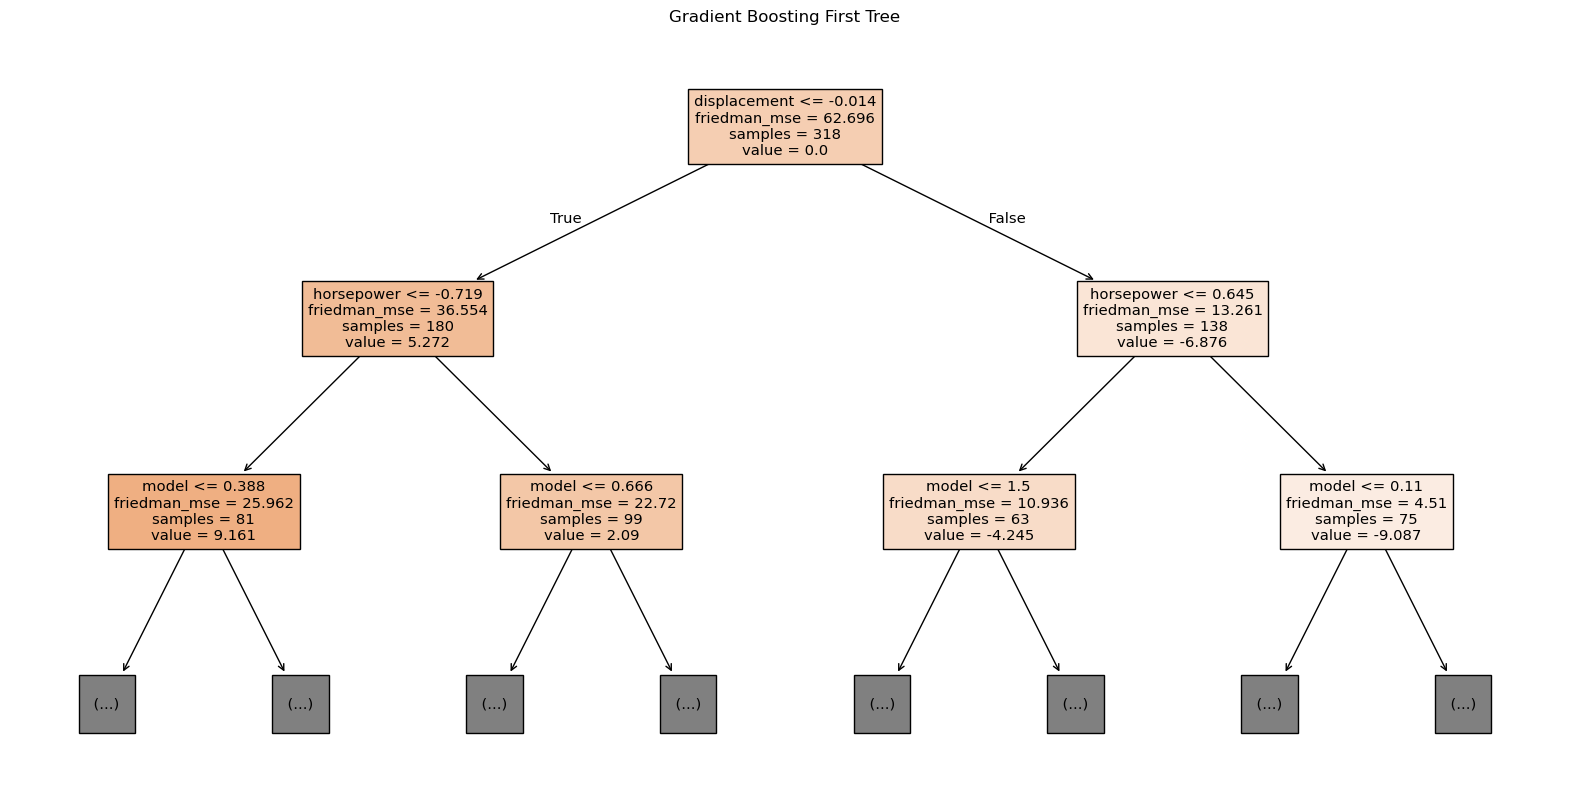

In [205]:
# Step 7: Plot a single decision tree
# Your code here
plt.figure(figsize=(20,10))
plot_tree(best_gb.estimators_[0,0],
           feature_names=x_train.columns, 
           class_names=['Low MPG ', 'High MPG'],
           filled=True, 
           max_depth=2)
plt.title("Gradient Boosting First Tree")

## Step 8: Feature Importances
Extract and plot the feature importances from both the Random Forest and Gradient Boosting models. Use a horizontal bar chart to visualize.

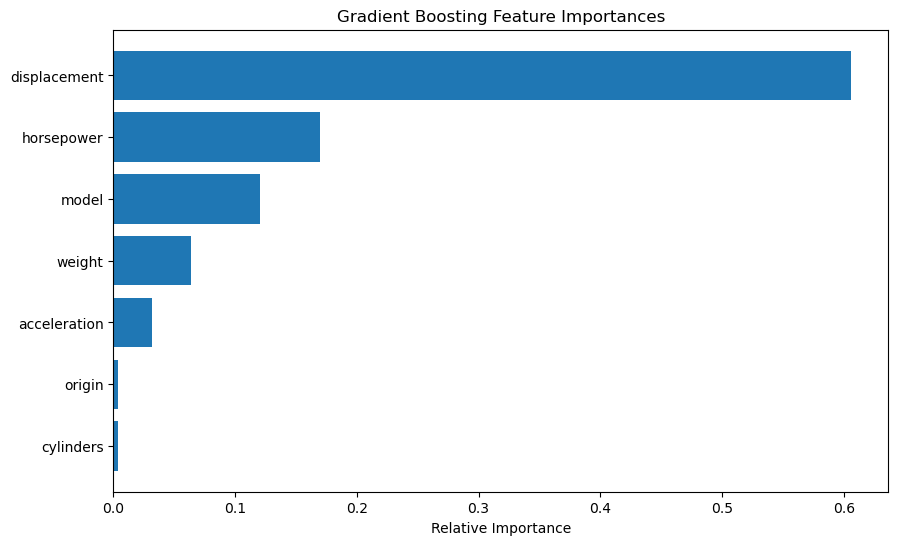

In [204]:
# Step 8: Plot feature importances
# Your code here
# importance of features
importances = best_gb.feature_importances_
indices = np.argsort(importances)[::1]
plt.figure(figsize=(10, 6))
plt.title("Gradient Boosting Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [x_train.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Submission
Save your completed notebook and submit it for review.